In [1]:
# Import der nötigen Datenverarbeitungsbibliothek
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# Daten aus den CSV Dateien einlesen
dwd_clima = pd.read_csv("data/dwd_climadata.csv")
springorum = pd.read_csv("data/spring_day_2019.csv")
wittener = pd.read_csv("data/witt_day_2019.csv")

In [65]:
# Daten in einem großen Dataframe speichern und doppelte Einträge löschen
df = pd.concat([dwd_clima, springorum, wittener], axis= 1)
df = df.drop(['STATIONS_ID', 'Time'], axis=1)


In [66]:
# Dataframes werden aufgesplittet nach den Kriterien (Wochentag/Wochenende/Ferien)

# Initialisierung nötig, da ansonsten bei mehrfacher Ausführung Inhalt doppelt gesichert werden. wd = workingdays (Mo-Fr), wknd = weekend (sa,sun), mon = mondays
wd = pd.DataFrame()
wknd = pd.DataFrame()
mon = pd.DataFrame()

# wd_hol = workingdays in holidays, wknd_hol = weekends in holidays
wd_hol = pd.DataFrame()
wknd_hol = pd.DataFrame()

wd_wo_hol = pd.DataFrame()
wknd_wo_hol = pd.DataFrame()


# Werktage speichern 1.01.2019 war ein Dienstag
wd = wd.append(df.iloc[::7])
wd = wd.append(df.iloc[1::7])
wd = wd.append(df.iloc[2::7])
wd = wd.append(df.iloc[3::7])
wd = wd.append(df.iloc[6::7])

wd = wd.sort_index()

# Wochenenden speichern
wknd = wknd.append(df.iloc[4::7])
wknd = wknd.append(df.iloc[5::7])

wknd = wknd.sort_index()

mon = mon.append(df.iloc[6::7])

# Ferientage speichern, jeweils für Werk- und Wochenendtage

# Winterferien zu Jahresbeginn
wd_hol = wd_hol.append(wd[wd['MESS_DATUM'] <= 20190106])
# Osterferien
wd_hol = wd_hol.append(wd[wd['MESS_DATUM']>= 20190413])
wd_hol = wd_hol.drop(wd_hol[wd_hol.MESS_DATUM > 20190428].index)
# Sommerferien
wd_hol = wd_hol.append(wd[wd['MESS_DATUM']>= 20190713])
wd_hol = wd_hol.drop(wd_hol[wd_hol.MESS_DATUM > 20190827].index)
# Herbstferien
wd_hol = wd_hol.append(wd[wd['MESS_DATUM']>= 20191012])
wd_hol = wd_hol.drop(wd_hol[wd_hol.MESS_DATUM > 20191027].index)
#Winterferien zu Jahresende
wd_hol = wd_hol.append(wd[wd['MESS_DATUM'] >= 20191221])

# Winterferien zu Jahresbeginn
wknd_hol = wknd_hol.append(wknd[wknd['MESS_DATUM'] <= 20190106])
# Osterferien
wknd_hol = wknd_hol.append(wknd[wknd['MESS_DATUM']>= 20190413])
wknd_hol = wknd_hol.drop(wknd_hol[wknd_hol.MESS_DATUM > 20190428].index)
# Sommerferien
wknd_hol = wknd_hol.append(wknd[wknd['MESS_DATUM']>= 20190713])
wknd_hol = wknd_hol.drop(wknd_hol[wknd_hol.MESS_DATUM > 20190827].index)
# Herbstferien
wknd_hol = wknd_hol.append(wknd[wknd['MESS_DATUM']>= 20191012])
wknd_hol = wknd_hol.drop(wknd_hol[wknd_hol.MESS_DATUM > 20191027].index)
#Winterferien zu Jahresende
wknd_hol = wknd_hol.append(wknd[wknd['MESS_DATUM'] >= 20191221])

wknd_wo_hol = wknd_wo_hol.append(wknd)
wknd_wo_hol = wknd_wo_hol.append(wknd_hol)
wknd_wo_hol.drop_duplicates(subset=['MESS_DATUM'],keep=False, inplace=True)

wd_wo_hol = wd_wo_hol.append(wd)
wd_wo_hol = wd_wo_hol.append(wd_hol)
wd_wo_hol.drop_duplicates(subset=['MESS_DATUM'],keep=False, inplace=True)
#print(mon)

In [9]:
grenzeRegen = 0.5
grenzeSchnee = 2.0
grenzeTemperatur = 12.0
grenzeWind = 10.0

#result = df[df['MESS_DATUM']>= 20191201].mean()
#wochenende_gesamt_df['sp_gesamt'].mean()
#wochenende_gesamt_df['Wittener Str. Gesamt'].mean()
#result['Bedeckung'].mean()


In [11]:
#Dataframes gesplittet in nass und trocken und kalt und warm
wd_regen = wd[wd['Niederschlag'] > grenzeRegen]
wknd_regen = wknd[wknd['Niederschlag'] > grenzeRegen]
wd_trocken = wd[wd['Niederschlag'] <= grenzeRegen]
wknd_trocken = wknd[wknd['Niederschlag'] <= grenzeRegen]
wd_kalt = wd[wd['Temperatur_mittel'] < grenzeTemperatur]
wknd_kalt = wknd[wknd['Temperatur_mittel'] < grenzeTemperatur]
wd_warm = wd[wd['Temperatur_mittel'] >= grenzeTemperatur]
wknd_warm = wknd[wknd['Temperatur_mittel'] >= grenzeTemperatur]

wd_hol_regen = wd_hol[wd_hol['Niederschlag'] > grenzeRegen]
wd_wo_hol_regen = wd_wo_hol[wd_wo_hol['Niederschlag'] > grenzeRegen]
wd_hol_trocken = wd_hol[wd_hol['Niederschlag'] <= grenzeRegen]
wd_wo_hol_trocken = wd_wo_hol[wd_wo_hol['Niederschlag'] <= grenzeRegen]
wd_hol_regen = wd_hol[wd_hol['Temperatur_mittel'] < grenzeTemperatur]
wd_wo_hol_kalt = wd_wo_hol[wd_wo_hol['Temperatur_mittel'] < grenzeTemperatur]
wd_hol_warm = wd_hol[wd_hol['Temperatur_mittel'] >= grenzeTemperatur]
wd_wo_hol_warm = wd_wo_hol[wd_wo_hol['Temperatur_mittel'] >= grenzeTemperatur]

wknd_hol_regen = wknd_hol[wknd_hol['Niederschlag'] > grenzeRegen]
wknd_wo_hol_regen = wknd_wo_hol[wknd_wo_hol['Niederschlag'] > grenzeRegen]
wknd_hol_trocken = wknd_hol[wknd_hol['Niederschlag'] <= grenzeRegen]
wknd_wo_hol_trocken = wknd_wo_hol[wknd_wo_hol['Niederschlag'] <= grenzeRegen]
wknd_hol_kalt = wknd_hol[wknd_hol['Temperatur_mittel'] < grenzeTemperatur]
wknd_wo_hol_kalt = wknd_wo_hol[wknd_wo_hol['Temperatur_mittel'] < grenzeTemperatur]
wknd_hol_warm = wknd_hol[wknd_hol['Temperatur_mittel'] >= grenzeTemperatur]
wknd_wo_hol_warm = wknd_wo_hol[wknd_wo_hol['Temperatur_mittel'] >= grenzeTemperatur]


# Größe der einzelnen Arrays ausgeben
regentage = len(wknd_regen.index) + len(wd_regen.index)
ferientage = len(wknd_hol.index) + len(wd_hol.index)
wochentage_regen = len(wd_regen.index)
wochentage = len(wd.index)
wochentage_regen_ferien = len(wd_hol_regen)
print("Wochentage: {} \nRegentage: {} \nFerientage: {} \nWochentage mit Regen: {} \nWochentage in Ferien mit Regen: {}".format(wochentage, regentage, ferientage, wochentage_regen, wochentage_regen_ferien))


Wochentage: 261 
Regentage: 158 
Ferientage: 95 
Wochentage mit Regen: 113 
Wochentage in Ferien mit Regen: 14


<function matplotlib.pyplot.show(*args, **kw)>

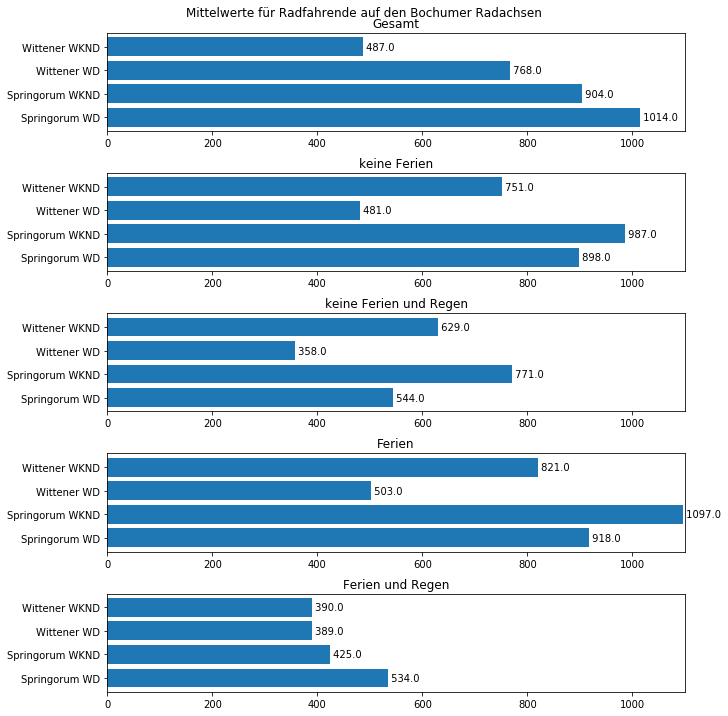

In [13]:
# Plotten der Ergebnisse
names = ['Springorum WD','Springorum WKND','Wittener WD', 'Wittener WKND']
values_normal = [wd['sp_gesamt'].mean(),  wknd['sp_gesamt'].mean(), wd['Wittener Str. Gesamt'].mean(), wknd['Wittener Str. Gesamt'].mean()]
values_normal = np.around(values_normal)

values_ohneFerien = [wknd_wo_hol['sp_gesamt'].mean(),  wd_wo_hol['sp_gesamt'].mean(), wknd_wo_hol['Wittener Str. Gesamt'].mean(), wd_wo_hol['Wittener Str. Gesamt'].mean()]
values_ohneFerien = np.around(values_ohneFerien)

values_ferien = [wknd_hol['sp_gesamt'].mean(),  wd_hol['sp_gesamt'].mean(), wknd_hol['Wittener Str. Gesamt'].mean(), wd_hol['Wittener Str. Gesamt'].mean()]
values_ferien = np.around(values_ferien)

values_regen = [wd_regen['sp_gesamt'].mean(), wknd_regen['sp_gesamt'].mean(), wd_regen['Wittener Str. Gesamt'].mean(),  wknd_regen['Wittener Str. Gesamt'].mean()]
values_regen = np.around(values_regen)

values_regen_ofer = [wknd_wo_hol_regen['sp_gesamt'].mean(), wd_wo_hol_regen['sp_gesamt'].mean(), wknd_wo_hol_regen['Wittener Str. Gesamt'].mean(),  wd_wo_hol_regen['Wittener Str. Gesamt'].mean()]
values_regen_ofer = np.around(values_regen_ofer)

values_regen_fe = [wknd_hol_regen['sp_gesamt'].mean(), wd_hol_regen['sp_gesamt'].mean(), wknd_hol_regen['Wittener Str. Gesamt'].mean(),  wd_hol_regen['Wittener Str. Gesamt'].mean()]
values_regen_fe = np.around(values_regen_fe)

fig, axs = plt.subplots(5, 1, constrained_layout=True, figsize=(10, 10))
#fig(figsize=(10, 10))
#for i in axs:
#    axs[i].set_ylim([0, 1100])

fig.suptitle('Mittelwerte für Radfahrende auf den Bochumer Radachsen')
axs[0].barh(names, values_normal)
axs[0].set_title('Gesamt')
axs[0].set_xlim([0, 1100])
for i, v in enumerate(values_normal):
    axs[0].text(v, i, " "+str(v), color='black', va='center')

axs[1].barh(names, values_ohneFerien)
axs[1].set_title('keine Ferien')
axs[1].set_xlim([0, 1100])
for i, v in enumerate(values_ohneFerien):
    axs[1].text(v, i, " "+str(v), color='black', va='center')

axs[2].barh(names, values_regen_ofer)
axs[2].set_title('keine Ferien und Regen')
axs[2].set_xlim([0, 1100])
for i, v in enumerate(values_regen_ofer):
    axs[2].text(v, i, " "+str(v), color='black', va='center')

axs[3].barh(names, values_ferien)
axs[3].set_title('Ferien')
axs[3].set_xlim([0, 1100])
for i, v in enumerate(values_ferien):
    axs[3].text(v, i, " "+str(v), color='black', va='center')

axs[4].barh(names, values_regen_fe)
axs[4].set_title('Ferien und Regen')
axs[4].set_xlim([0, 1100])
for i, v in enumerate(values_regen_fe):
    axs[4].text(v, i, " "+str(v), color='black', va='center')    


plt.show


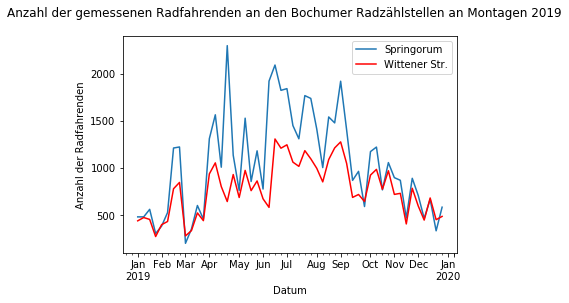

In [80]:
ax = plt.gca()
mon['MESS_DATUM'] = pd.to_datetime(mon['MESS_DATUM'], format='%Y%m%d')

mon.plot(x ='MESS_DATUM', y  ='sp_gesamt', kind='line', ax=ax, label='Springorum')
mon.plot(x ='MESS_DATUM', y  ='Wittener Str. Gesamt', kind='line', color='red', ax=ax, label='Wittener Str.')

plt.suptitle('Anzahl der gemessenen Radfahrenden an den Bochumer Radzählstellen an Montagen 2019')
plt.xlabel('Datum')
plt.ylabel('Anzahl der Radfahrenden')
plt.show()



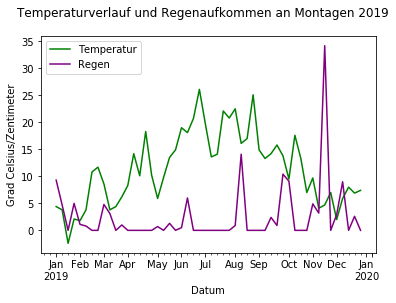

In [79]:
axb= plt.gca()

mon.plot(x= 'MESS_DATUM', y  ='Temperatur_mittel', kind='line', color='green', label='Temperatur', ax=axb)
mon.plot(x= 'MESS_DATUM', y  ='Niederschlag', kind='line', color='purple', label='Regen', ax=axb)

plt.suptitle('Temperaturverlauf und Regenaufkommen an Montagen 2019')
plt.xlabel('Datum')
plt.ylabel('Grad Celsius/Zentimeter')
plt.show()